### exp1. 가위 바위 보 분류기 만들기

커널정보 = base(python 3.9.7)

#### 0. 루브릭
***

|**평가문항**|**상세기준**|
|------------|-------------|
|1. 이미지 분류기 모델이 성공적으로 만들어졌는가?|트레이닝이 정상적으로 수행되었음|
|2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?|데이터셋의 다양성, 정규화 등의 시도가 적절하였음|
|3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?|60% 이상 도달하였음|

#### 1. 필요한 모듈 import
***

In [1]:
from PIL import Image
import glob
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import random

print("done")

done


#### 2. 데이터 준비하기
***

##### 2.1 data load 및 resize

In [2]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "C:/project/aiffel_exp/exp1_rsp project/rock_scissor_paper3/scissor3" # 경로를 그대로 복사하면 안됨. \를 /로 변경해줘야함
resize_images(image_dir_path)
image_dir_path = "C:/project/aiffel_exp/exp1_rsp project/rock_scissor_paper3/rock3"
resize_images(image_dir_path)
image_dir_path = "C:/project/aiffel_exp/exp1_rsp project/rock_scissor_paper3/paper3"
resize_images(image_dir_path)

print("가위 바위 보 이미지 resize 완료!")

300  images to be resized.
300  images resized.
300  images to be resized.
300  images resized.
300  images to be resized.
300  images resized.
가위 바위 보 이미지 resize 완료!


##### 2.2 학습 데이타 적재하기

In [3]:
def load_data(img_path, number_of_data=900):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3 # 1,3  1은 흑백, 3이면 컬러
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor3/*.jpg'): #여기서도 경로 설정 꼼꼼하게
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock3/*.jpg'): #여기서도 경로 설정 꼼꼼하게
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper3/*.jpg'):  #여기서도 경로 설정 꼼꼼하게
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "C:/project/aiffel_exp/exp1_rsp project/rock_scissor_paper3"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 900 입니다.
x_train shape: (900, 28, 28, 3)
y_train shape: (900,)


라벨:  0


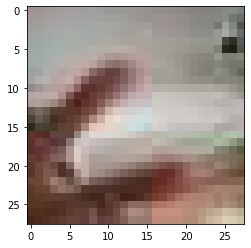

In [4]:
plt.imshow(x_train[1])
print('라벨: ', y_train[1])

#### 3. 딥러닝 네트워크 모델 설계하기
***

In [5]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

#### 4. 모델 학습시키기
***

In [6]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10) # eopchs는 반복횟수

Epoch 1/10
29/29 [==============================] - 2s 4ms/step - loss: 12.5586 - accuracy: 0.4044
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 0.7295 - accuracy: 0.7033
Epoch 3/10
29/29 [==============================] - 0s 4ms/step - loss: 0.2297 - accuracy: 0.9111
Epoch 4/10
29/29 [==============================] - 0s 4ms/step - loss: 0.0531 - accuracy: 0.9811
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9911
Epoch 6/10
29/29 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 7/10
29/29 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 8/10
29/29 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 10/10
29/29 [==============================] - 0s 3ms/step - loss: 8.4183e-04 - accuracy: 1.0000


#### 5. 학습모델 테스트하기
***

##### 5.1 테스트 데이터 만들기

In [7]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'): #여기서도 경로 설정 꼼꼼하게
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'): #여기서도 경로 설정 꼼꼼하게
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):  #여기서도 경로 설정 꼼꼼하게
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "C:/project/aiffel_exp/exp1_rsp project/rock_scissor_paper3/test"
(x_test, y_test)=load_data(image_dir_path) #train을 test로
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape)) # train을 test로 바꿔야함
print("y_test shape: {}".format(y_test.shape)) # train을 test로 바꿔야함

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


데이터 적재 확인

라벨:  0


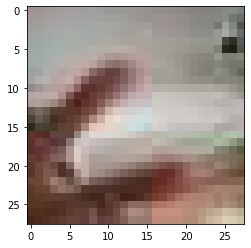

In [8]:
plt.imshow(x_train[1])
print('라벨: ', y_train[1])

##### 5.2 모델 정확도 체크

In [9]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.0843 - accuracy: 0.6000 - 141ms/epoch - 14ms/step
test_loss: 1.0843168497085571 
test_accuracy: 0.6000000238418579


#### 6. 정확도 개선하기
***

##### 6.1 hyperparameter 값 바꿔보기

정확도를 높이기 위해 학습 모델의 hyperparameter 값에 변화를 주면서 epoch를 10, 20 ,30 3단계로 학습을 진행했다.
그리고 진행한 hyperparameter 값과 epoch 값을 엑셀에 따로 기록했다.
15회의 변화와 정확도를 기록하면서 아래의 내용을 추론했다.
1. 내가 입력한 데이터에서 epoch 20회 이상은 과적합이다.
2. 내가 진행한 hyperparameter 값의 변화는 정확도의 유의미한 상승를 이끌어내지 못한다.

결국 아래의 이유로 데이터셋을 변경하는 것으로 정확도를 높이고자 했다.
1. 샘플의 수량이 적고
2. 직접 이미지를 제작하면서 손모양 외에 배경이 함께 촬영되었고
3. 조원들과 이미지를 공유하며 서로 다른 배경과 손동작들이 섞였다.

In [10]:
df = pd.read_excel('C:/project/aiffel_exp/exp1_rsp project/test_record.xlsx')

print(df)

    index  Conv2D  Conv2D.1  Dense  epochs  accuracy
0       0       8        16     64      10      0.36
1       1       8        16     64      20      0.43
2       2       8        16     64      30      0.36
3       3      16        32     64      10      0.41
4       4      16        32     64      20      0.37
5       5      16        32     64      30      0.36
6       6      32        32     64      10      0.33
7       7      32        32     64      20      0.31
8       8      32        32     64      30      0.21
9       9      32        64     64      10      0.33
10     10      32        64     64      20      0.33
11     11      32        64     64      30      0.33
12     12      32        64    128      10      0.33
13     13      32        64    128      20      0.35
14     14      32        64    128      30      0.31


#### 7. 데이터셋 변경하기
***



##### 7.1 새로운 학습데이터 로드 및 리사이즈

In [11]:
def load_data(img_path, number_of_data=2517):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=4 # color 값을 3을 주면 에러가 나서 4를 줬다. 왜 4지?? -> png 파일은 투명도 채널이 하나 더 있음
    # 데이터를 불러와서 shape를 확인해보면 채널 수를 알 수 있다. x_train[0].shape
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.png'): #여기서도 경로 설정 꼼꼼하게
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.png'): #여기서도 경로 설정 꼼꼼하게
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.png'):  #여기서도 경로 설정 꼼꼼하게
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "C:/project/aiffel_exp/exp1_rsp project/rock_scissor_paper4"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2517 입니다.
x_train shape: (2517, 28, 28, 4)
y_train shape: (2517,)


In [12]:
x_train[0]
x_train[0].shape

(28, 28, 4)

In [13]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [14]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


라벨:  0


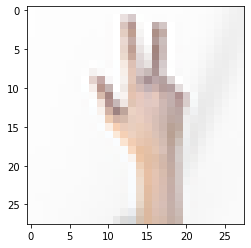

In [15]:
plt.imshow(x_train[5])
print('라벨: ', y_train[5])

##### 7.2 새로운 테스트 데이터 로드 및 리사이즈

In [16]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.png")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "png")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "C:/project/aiffel_exp/exp1_rsp project/rock_scissor_paper4/test/scissors" # 경로를 그대로 복사하면 안됨. \를 /로 변경해줘야함
resize_images(image_dir_path)
image_dir_path = "C:/project/aiffel_exp/exp1_rsp project/rock_scissor_paper4/test/rock"
resize_images(image_dir_path)
image_dir_path = "C:/project/aiffel_exp/exp1_rsp project/rock_scissor_paper4/test/paper"
resize_images(image_dir_path)

print("가위 바위 보 이미지 resize 완료!")

124  images to be resized.
124  images resized.
124  images to be resized.
124  images resized.
124  images to be resized.
124  images resized.
가위 바위 보 이미지 resize 완료!


In [17]:
def load_data(img_path, number_of_data=372):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=4
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.png'): #여기서도 경로 설정 꼼꼼하게
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.png'): #여기서도 경로 설정 꼼꼼하게
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.png'):  #여기서도 경로 설정 꼼꼼하게
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "C:/project/aiffel_exp/exp1_rsp project/rock_scissor_paper4/test"
(x_test, y_test)=load_data(image_dir_path) #train을 test로
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape)) # train을 test로 바꿔야함
print("y_test shape: {}".format(y_test.shape)) # train을 test로 바꿔야함

테스트데이터(x_test)의 이미지 개수는 372 입니다.
x_test shape: (372, 28, 28, 4)
y_test shape: (372,)


##### 7.3 모델 설계 및 학습
***

In [22]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,4)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        1184      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [23]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10) # eopchs는 반복횟수

Epoch 1/10
79/79 [==============================] - 1s 5ms/step - loss: 8.1988 - accuracy: 0.7636
Epoch 2/10
79/79 [==============================] - 0s 4ms/step - loss: 0.0222 - accuracy: 0.9952
Epoch 3/10
79/79 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.9992
Epoch 4/10
79/79 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 5/10
79/79 [==============================] - 0s 4ms/step - loss: 3.8270e-04 - accuracy: 1.0000
Epoch 6/10
79/79 [==============================] - 0s 4ms/step - loss: 1.9372e-04 - accuracy: 1.0000
Epoch 7/10
79/79 [==============================] - 0s 4ms/step - loss: 1.3307e-04 - accuracy: 1.0000
Epoch 8/10
79/79 [==============================] - 0s 4ms/step - loss: 9.9455e-05 - accuracy: 1.0000
Epoch 9/10
79/79 [==============================] - 0s 4ms/step - loss: 7.3603e-05 - accuracy: 1.0000
Epoch 10/10
79/79 [==============================] - 0s 4ms/step - loss: 5.2515e-05 - accuracy: 1.

##### 7.4 모델 정확도 체크

In [24]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

12/12 - 0s - loss: 1.0727 - accuracy: 0.7823 - 115ms/epoch - 10ms/step
test_loss: 1.0727285146713257 
test_accuracy: 0.7822580933570862


##### 7.5 하이퍼파라미터 값에 따른 정확도

In [21]:
df = pd.read_excel('C:/project/aiffel_exp/exp1_rsp project/test_record2.xlsx')

print(df)

   index  Conv2D  Conv2D.1  Dense  epochs  accuracy
0      0      16        32     64      10      0.50
1      1      16        32     64      20      0.55
2      2      16        32     64      30      0.49
3      3      32        64    128      10      0.75
4      4      32        64    128      20      0.69
5      5      32        64    128      30      0.63
6      6      64       128    256      10      0.34
7      7      64       128    256      20      0.35
8      8      64       128    256      30      0.33


#### 8. 결론
***

1. 양질의 데이터 입력이 중요함을 알 수 있었다.
2. 데이터의 종류에 따라 일정 이상의 epochs는 과적합을 유발할 가능성이 높다.
3. 하이퍼파라미터 값들이 가지는 의미에 대한 공부가 필요하다. 이번 프로젝트에선 정확한 의미를 모른채 16배수로만 조절하였다.